## Data Preprocessing and Feature Engineering 

In [ ]:
#Import Libraries

In [3]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 401.6 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/282.6 kB 346.5 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 448.2 kB/s eta 0:00:01
   -------------------- ----------------- 153.6/282.6 kB 435.7 kB/s eta 0:00:01
   ------------------------ ------------- 184.3/282.6 kB 427.7 kB/s eta 0:00:01
   ------------------------ ------------- 184.3/282.6 kB 427.7 kB/s eta 0:00:01
   ------------------------------ ------- 225.3/282.6 kB 45

In [4]:
!pip install ppscore

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.3 MB 393.8 kB/s eta 0:00:27
   ---------------------------------------- 0.1/10.3 MB 573.4 kB/s eta 0:00:18
   ---------------------------------------- 0.1/10.3 MB 656.4 kB/s eta 0:00:16
    --------------------------------------- 0.1/10.3 MB 657.1 kB/s eta 0:00:16
    --------------------------------------- 0.2/10.3 MB 692.9 kB/s eta 0:00:15
    --------------------------------------- 0.2/10.3 MB 724.0 kB/s eta 0:00:14
   - -------------------------------------- 0.3/10.3 MB 741.6 kB/s eta 0:00:14
   - -------------------------------------- 0.3/10.3 MB 781.9 kB/s eta 0:00:13
   - -------------------------------------- 0.4/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
from yellowbrick.model_selection import rfecv

### 1. Data Exploration and Preprocessing:

In [ ]:
# Read the Data

In [2]:
df=pd.read_csv(r'C:\Users\sanket\Desktop\DS ASSIGNMENT\EDA2\EDA2\adult_with_headers.csv')

In [3]:
df

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [ ]:
#summary statistics

In [4]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [5]:
df.describe(include=object)

workclass education       marital_status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country  income  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#data types

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [ ]:
#checking for duplicates 

In [8]:
df.duplicated().sum()

24

In [9]:
df.shape

(32561, 15)

In [ ]:
#drop duplicates records

In [10]:
df.drop_duplicates(inplace =True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(32537, 15)

In [ ]:
# checking for null values

In [13]:
df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [14]:
df.isna()

age  workclass  fnlwgt  education  education_num  marital_status  \
0      False      False   False      False          False           False   
1      False      False   False      False          False           False   
2      False      False   False      False          False           False   
3      False      False   False      False          False           False   
4      False      False   False      False          False           False   
...      ...        ...     ...        ...            ...             ...   
32556  False      False   False      False          False           False   
32557  False      False   False      False          False           False   
32558  False      False   False      False          False           False   
32559  False      False   False      False          False           False   
32560  False      False   False      False          False           False   

       occupation  relationship   race    sex  capital_gain  capital_loss  \
0           False         False  False  False         False         False   
1           False         False  False  False         False         False   
2           False         False  False  False         False         False   
3           False         False  False  False         False         False   
4           False         False  False  False         False         False   
...           ...           ...    ...    ...           ...           ...   
32556       False         False  False  False         False         False   
32557       False         False  False  False         False         False   
32558       False         False  False  False         False         False   
32559       False         False  False  False         False         False   
32560       False         False  False  False         False         False   

       hours_per_week  native_country  income  
0               False           False   False  
1               False           False   False  
2               False           False   False  
3               False           False   False  
4               False           False   False  
...               ...             ...     ...  
32556           False           False   False  
32557           False           False   False  
32558           False           False   False  
32559           False           False   False  
32560           False           False   False  

[32537 rows x 15 columns]

In [15]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
#select only numerical features and drop categorical features

In [16]:
df.drop(columns=['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income'],inplace=True)

In [17]:
df

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32537 rows x 6 columns]

In [ ]:
# scaling the data

In [ ]:
# 1. Standard Scaling

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [19]:
# Standardization
sc=StandardScaler()
x=sc.fit_transform(df)
x

array([[ 0.03038995, -1.06356884,  1.13477712,  0.14829174, -0.21674317,
        -0.03566374],
       [ 0.8369732 , -1.00866848,  1.13477712, -0.14597544, -0.21674317,
        -2.22248299],
       [-0.0429358 ,  0.24503992, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       ...,
       [ 1.42357919, -0.35877886, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       [-1.2161478 ,  0.11092955, -0.42067868, -0.14597544, -0.21674317,
        -1.65552985],
       [ 0.9836247 ,  0.92981187, -0.42067868,  1.88763548, -0.21674317,
        -0.03566374]])

In [20]:
scaled_data = pd.DataFrame(x, columns=df.columns)
scaled_data

age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.030390 -1.063569       1.134777      0.148292     -0.216743   
1      0.836973 -1.008668       1.134777     -0.145975     -0.216743   
2     -0.042936  0.245040      -0.420679     -0.145975     -0.216743   
3      1.056950  0.425752      -1.198407     -0.145975     -0.216743   
4     -0.776193  1.408066       1.134777     -0.145975     -0.216743   
...         ...       ...            ...           ...           ...   
32532 -0.849519  0.639678       0.745913     -0.145975     -0.216743   
32533  0.103716 -0.335436      -0.420679     -0.145975     -0.216743   
32534  1.423579 -0.358779      -0.420679     -0.145975     -0.216743   
32535 -1.216148  0.110930      -0.420679     -0.145975     -0.216743   
32536  0.983625  0.929812      -0.420679      1.887635     -0.216743   

       hours_per_week  
0           -0.035664  
1           -2.222483  
2           -0.035664  
3           -0.035664  
4           -0.035664  
...               ...  
32532       -0.197650  
32533       -0.035664  
32534       -0.035664  
32535       -1.655530  
32536       -0.035664  

[32537 rows x 6 columns]

In [21]:
scaled_data.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  3.253700e+04  3.253700e+04   3.253700e+04  3.253700e+04  3.253700e+04   
mean  -7.555945e-17 -1.255685e-16   2.849858e-17  3.646945e-17  4.367598e-19   
std    1.000015e+00  1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.582777e+00 -1.681551e+00  -3.531590e+00 -1.459754e-01 -2.167432e-01   
25%   -7.761933e-01 -6.816726e-01  -4.206787e-01 -1.459754e-01 -2.167432e-01   
50%   -1.162616e-01 -1.082361e-01  -3.181473e-02 -1.459754e-01 -2.167432e-01   
75%    6.903217e-01  4.472760e-01   7.459132e-01 -1.459754e-01 -2.167432e-01   
max    3.770003e+00  1.226778e+01   2.301369e+00  1.338964e+01  1.058963e+01   

       hours_per_week  
count    3.253700e+04  
mean    -6.485884e-17  
std      1.000015e+00  
min     -3.194403e+00  
25%     -3.566374e-02  
50%     -3.566374e-02  
75%      3.693028e-01  
max      4.742941e+00

In [ ]:
#MinMaxScaler

In [22]:
mn=MinMaxScaler()

In [23]:
df.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [24]:
df

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32537 rows x 6 columns]

In [25]:
minmax_scaled = pd.DataFrame(mn.fit_transform(df), columns=df.columns)
minmax_scaled

age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.301370  0.044302       0.800000      0.021740           0.0   
1      0.452055  0.048238       0.800000      0.000000           0.0   
2      0.287671  0.138113       0.533333      0.000000           0.0   
3      0.493151  0.151068       0.400000      0.000000           0.0   
4      0.150685  0.221488       0.800000      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32532  0.136986  0.166404       0.733333      0.000000           0.0   
32533  0.315068  0.096500       0.533333      0.000000           0.0   
32534  0.561644  0.094827       0.533333      0.000000           0.0   
32535  0.068493  0.128499       0.533333      0.000000           0.0   
32536  0.479452  0.187203       0.533333      0.150242           0.0   

       hours_per_week  
0            0.397959  
1            0.122449  
2            0.397959  
3            0.397959  
4            0.397959  
...               ...  
32532        0.377551  
32533        0.397959  
32534        0.397959  
32535        0.193878  
32536        0.397959  

[32537 rows x 6 columns]

In [26]:
minmax_scaled.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32537.000000  32537.000000   32537.000000  32537.000000  32537.000000   
mean       0.295692      0.120547       0.605454      0.010785      0.020057   
std        0.186822      0.071689       0.171442      0.073880      0.092539   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.150685      0.071679       0.533333      0.000000      0.000000   
50%        0.273973      0.112788       0.600000      0.000000      0.000000   
75%        0.424658      0.152611       0.733333      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

       hours_per_week  
count    32537.000000  
mean         0.402452  
std          0.125989  
min          0.000000  
25%          0.397959  
50%          0.397959  
75%          0.448980  
max          1.000000

Normalization(MinMax Scaling):
-Scales value within the range of 0 to 1.

Standardization:
-Uses Z score for scaling.
-Scale values in such a way that the mean = 0 and standard deviation is 1.

### 2. Encoding Techniques:

In [ ]:
# load the data

In [3]:
data=pd.read_csv(r'C:\Users\sanket\Desktop\DS ASSIGNMENT\EDA2\EDA2\adult_with_headers.csv')

In [4]:
data

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [ ]:
# import libraries for encoding

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [6]:
data.describe(include=object)

workclass education       marital_status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country  income  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720

In [ ]:
# apply OneHotEncoding to 'sex'  features using get_dummies()

In [7]:
data= pd.get_dummies(data, columns=['sex'], drop_first=False)

In [8]:
print("\nAfter One-Hot Encoding (using get_dummies):")
print(data)


After One-Hot Encoding (using get_dummies):
       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not

In [9]:
df = pd.DataFrame(data)
df

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

       capital_gain  capital_loss  hours_per_week  native_country  income  \
0              2174             0              40   United-States   <=50K   
1                 0             0              13   United-States   <=50K   
2                 0             0              40   United-States   <=50K   
3                 0             0              40   United-States   <=50K   
4                 0             0              40            Cuba   <=50K   
...             ...           ...             ...             ...     ...   
32556             0             0              38   United-States   <=50K   
32557             0             0              40   United-States    >50K   
32558             0             0              40   United-States   <=50K   
32559             0             0              20   United-States   <=50K   
32560         15024             0              40   United-States    >50K   

       sex_ Female  sex_ Male  
0                0          1  
1                0          1  
2                0          1  
3                0          1  
4                1          0  
...            ...        ...  
32556            1          0  
32557            0          1  
32558            1          0  
32559            0          1  
32560            1          0  

[32561 rows x 16 columns]

In [ ]:
# Apply Label Encoding to Columns with More Than 5 Categories

In [10]:
columns_to_encode=['workclass','education','marital_status','occupation','relationship','race','native_country','income']

In [11]:
label_encoder = LabelEncoder()

In [12]:
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [13]:
df

age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  capital_gain  capital_loss  \
0               1             1     4          2174             0   
1               4             0     4             0             0   
2               6             1     4             0             0   
3               6             0     2             0             0   
4              10             5     2             0             0   
...           ...           ...   ...           ...           ...   
32556          13             5     4             0             0   
32557           7             0     4             0             0   
32558           1             4     4             0             0   
32559           1             3     4             0             0   
32560           4             5     4         15024             0   

       hours_per_week  native_country  income  sex_ Female  sex_ Male  
0                  40              39       0            0          1  
1                  13              39       0            0          1  
2                  40              39       0            0          1  
3                  40              39       0            0          1  
4                  40               5       0            1          0  
...               ...             ...     ...          ...        ...  
32556              38              39       0            1          0  
32557              40              39       1            0          1  
32558              40              39       0            1          0  
32559              20              39       0            0          1  
32560              40              39       1            1          0  

[32561 rows x 16 columns]

Pros:
Simplicity: Label Encoding is simple and efficient in terms of memory usage because it does not increase the dimensionality of the data.
Useful for Ordinal Data: It is a good choice when dealing with ordinal data where the categories have an inherent order (e.g., size: small, medium, large).

Cons:
Assumes Ordinality: Label Encoding assigns an order to categories, which can be problematic for nominal variables (e.g., animal species, countries) where no such order exists. This can lead to models assigning undue weight to higher or lower numbers.
Bias in Non-Ordinal Data: Since it introduces arbitrary numerical values, the model may falsely interpret the relationship between categories, leading to inaccurate predictions.

### 3. Feature Engineering:

In [14]:
df.head()

age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country  income  sex_ Female  sex_ Male  
0              39       0            0          1  
1              39       0            0          1  
2              39       0            0          1  
3              39       0            0          1  
4               5       0            1          0

In [15]:
y = df['income']

In [16]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int32

In [21]:
df.drop(columns=['income'],inplace=True)
x = df.iloc[:,:]
x

age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  capital_gain  capital_loss  \
0               1             1     4          2174             0   
1               4             0     4             0             0   
2               6             1     4             0             0   
3               6             0     2             0             0   
4              10             5     2             0             0   
...           ...           ...   ...           ...           ...   
32556          13             5     4             0             0   
32557           7             0     4             0             0   
32558           1             4     4             0             0   
32559           1             3     4             0             0   
32560           4             5     4         15024             0   

       hours_per_week  native_country  sex_ Female  sex_ Male  
0                  40              39            0          1  
1                  13              39            0          1  
2                  40              39            0          1  
3                  40              39            0          1  
4                  40               5            1          0  
...               ...             ...          ...        ...  
32556              38              39            1          0  
32557              40              39            0          1  
32558              40              39            1          0  
32559              20              39            0          1  
32560              40              39            1          0  

[32561 rows x 15 columns]

In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int32

In [ ]:
# Recursive Feature Elimination 

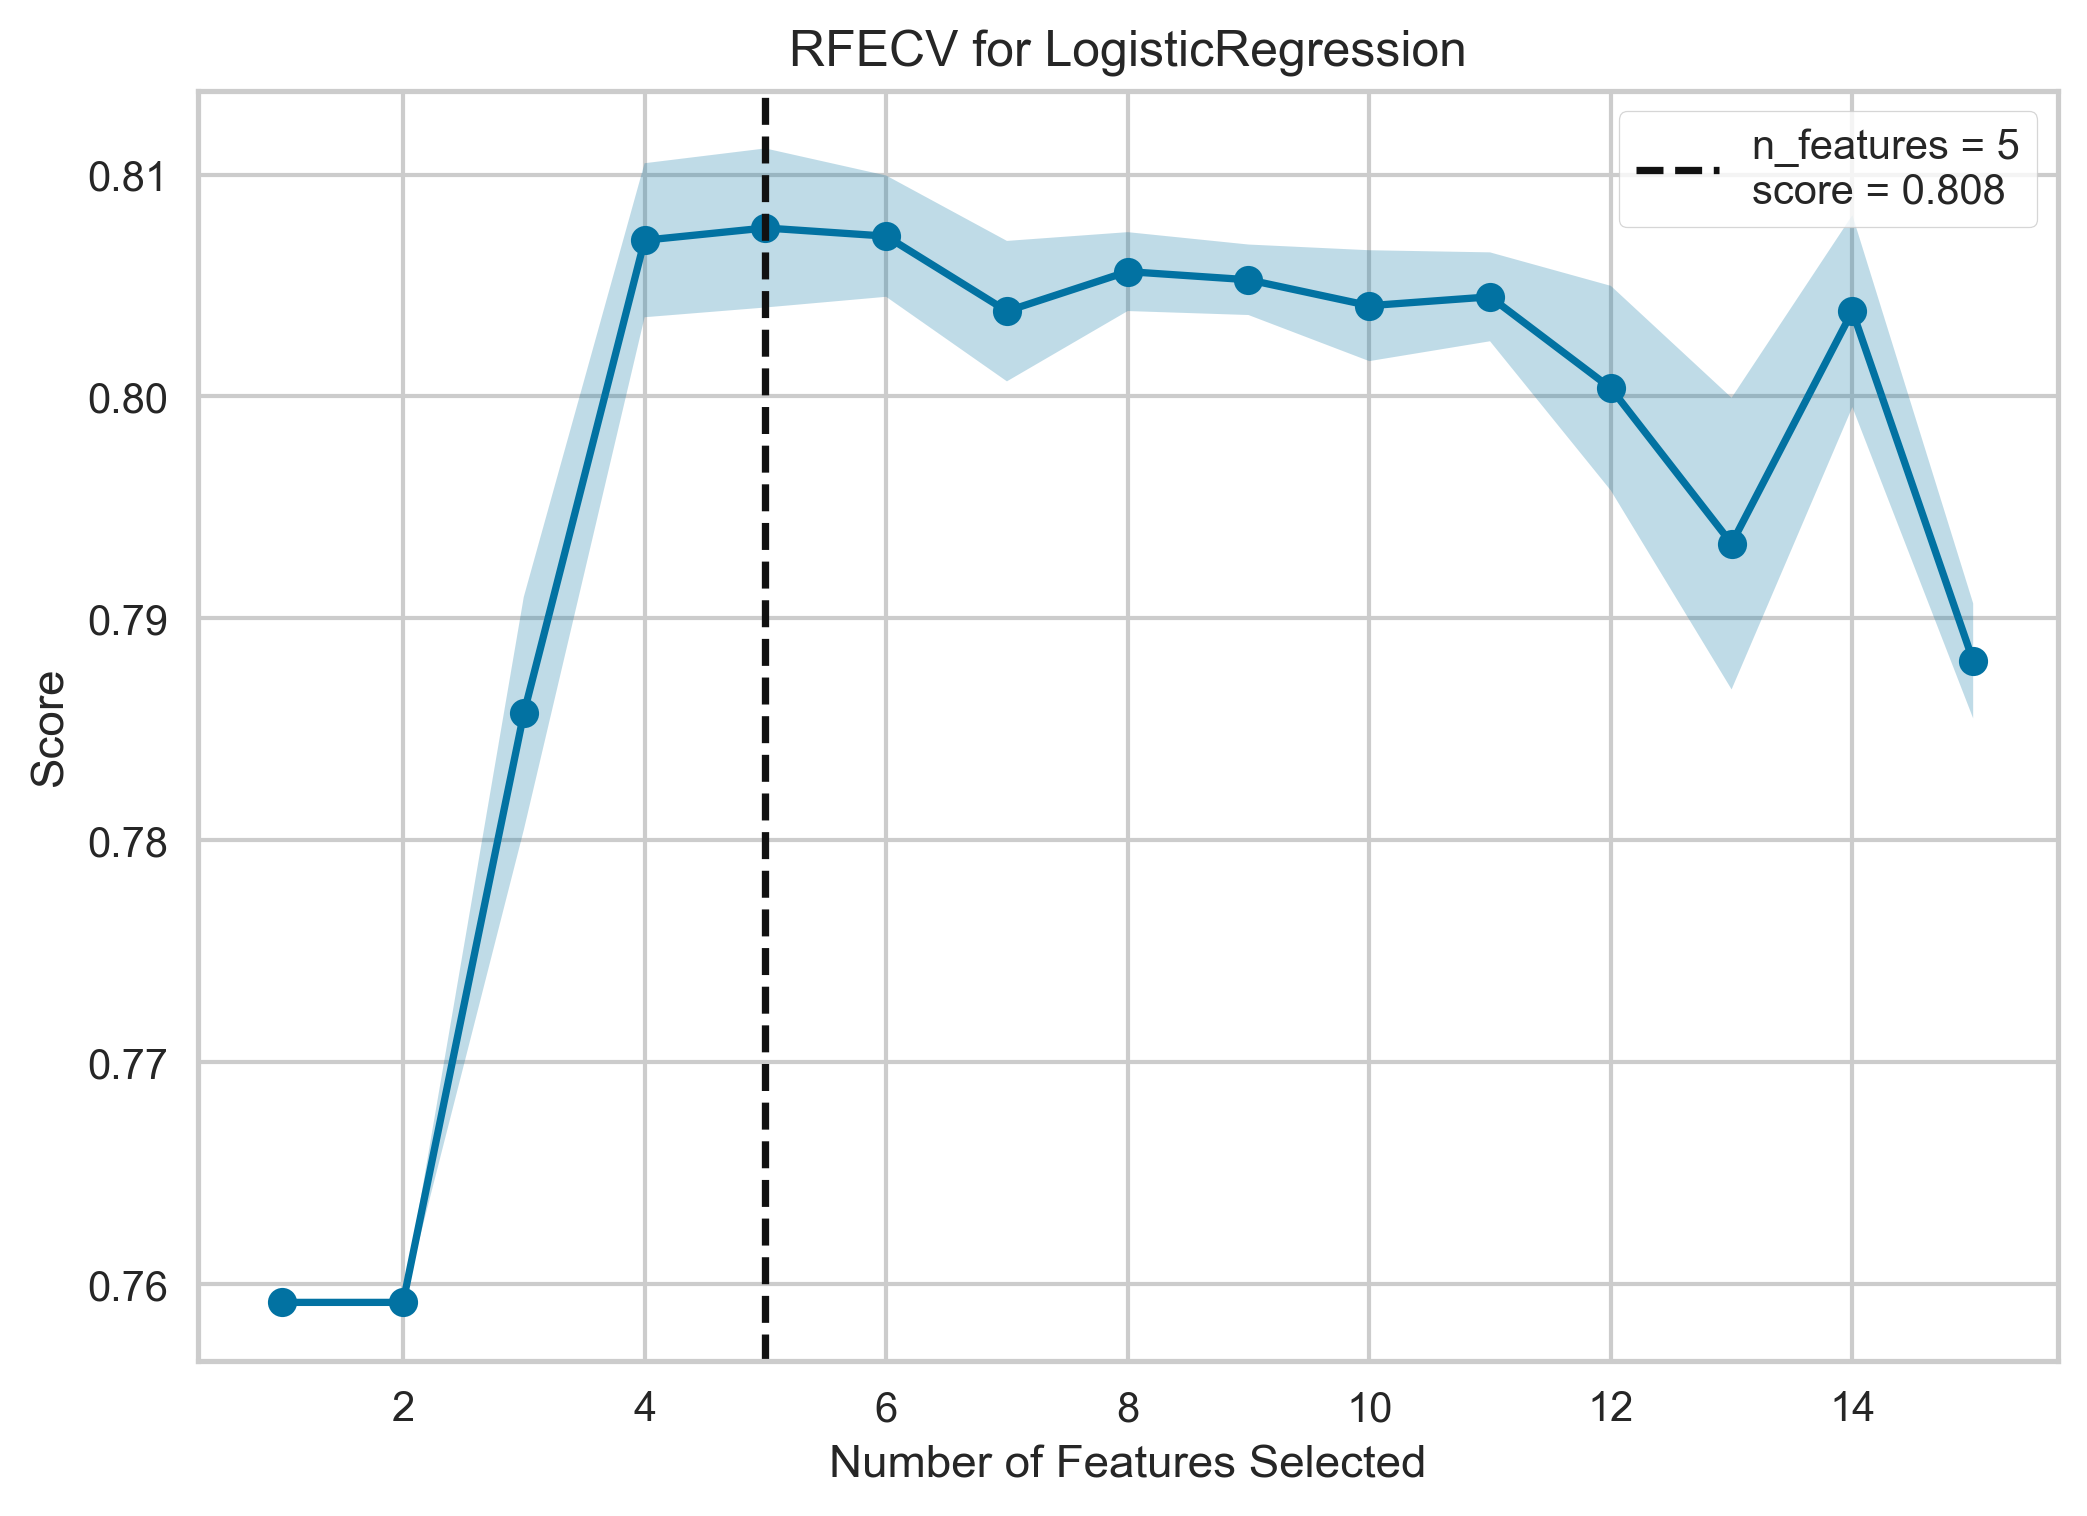

In [23]:
rfe = rfecv(LogisticRegression(),x,y)

In [24]:
rfe.ranking_

array([ 3,  7, 11,  6,  1,  1,  5,  1,  2, 10,  9,  4,  8,  1,  1])

In [25]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_ Female',
       'sex_ Male'],
      dtype='object')

In [26]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})

In [27]:
rfe_Sel

Ranking        Features
0         3             age
1         7       workclass
2        11          fnlwgt
3         6       education
4         1   education_num
5         1  marital_status
6         5      occupation
7         1    relationship
8         2            race
9        10    capital_gain
10        9    capital_loss
11        4  hours_per_week
12        8  native_country
13        1     sex_ Female
14        1       sex_ Male

In [28]:
rfe_Sel[rfe_Sel['Ranking']==1]

Ranking        Features
4         1   education_num
5         1  marital_status
7         1    relationship
13        1     sex_ Female
14        1       sex_ Male

### 4. Feature Selection:

In [ ]:
# Identify and remove outliers using Isolation Forest

In [35]:
df

age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  capital_gain  capital_loss  \
0               1             1     4          2174             0   
1               4             0     4             0             0   
2               6             1     4             0             0   
3               6             0     2             0             0   
4              10             5     2             0             0   
...           ...           ...   ...           ...           ...   
32556          13             5     4             0             0   
32557           7             0     4             0             0   
32558           1             4     4             0             0   
32559           1             3     4             0             0   
32560           4             5     4         15024             0   

       hours_per_week  native_country  sex_ Female  sex_ Male  
0                  40              39            0          1  
1                  13              39            0          1  
2                  40              39            0          1  
3                  40              39            0          1  
4                  40               5            1          0  
...               ...             ...          ...        ...  
32556              38              39            1          0  
32557              40              39            0          1  
32558              40              39            1          0  
32559              20              39            0          1  
32560              40              39            1          0  

[32561 rows x 15 columns]

In [36]:
df.describe()

age     workclass        fnlwgt     education  education_num  \
count  32561.000000  32561.000000  3.256100e+04  32561.000000   32561.000000   
mean      38.581647      3.868892  1.897784e+05     10.298210      10.080679   
std       13.640433      1.455960  1.055500e+05      3.870264       2.572720   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.178270e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.783560e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.370510e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       marital_status    occupation  relationship          race  capital_gain  \
count    32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean         2.611836      6.572740      1.446362      3.665858   1077.648844   
std          1.506222      4.228857      1.606771      0.848806   7385.292085   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000      0.000000   
50%          2.000000      7.000000      1.000000      4.000000      0.000000   
75%          4.000000     10.000000      3.000000      4.000000      0.000000   
max          6.000000     14.000000      5.000000      4.000000  99999.000000   

       capital_loss  hours_per_week  native_country   sex_ Female  \
count  32561.000000    32561.000000    32561.000000  32561.000000   
mean      87.303830       40.437456       36.718866      0.330795   
std      402.960219       12.347429        7.823782      0.470506   
min        0.000000        1.000000        0.000000      0.000000   
25%        0.000000       40.000000       39.000000      0.000000   
50%        0.000000       40.000000       39.000000      0.000000   
75%        0.000000       45.000000       39.000000      1.000000   
max     4356.000000       99.000000       41.000000      1.000000   

          sex_ Male  
count  32561.000000  
mean       0.669205  
std        0.470506  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

<Axes: >

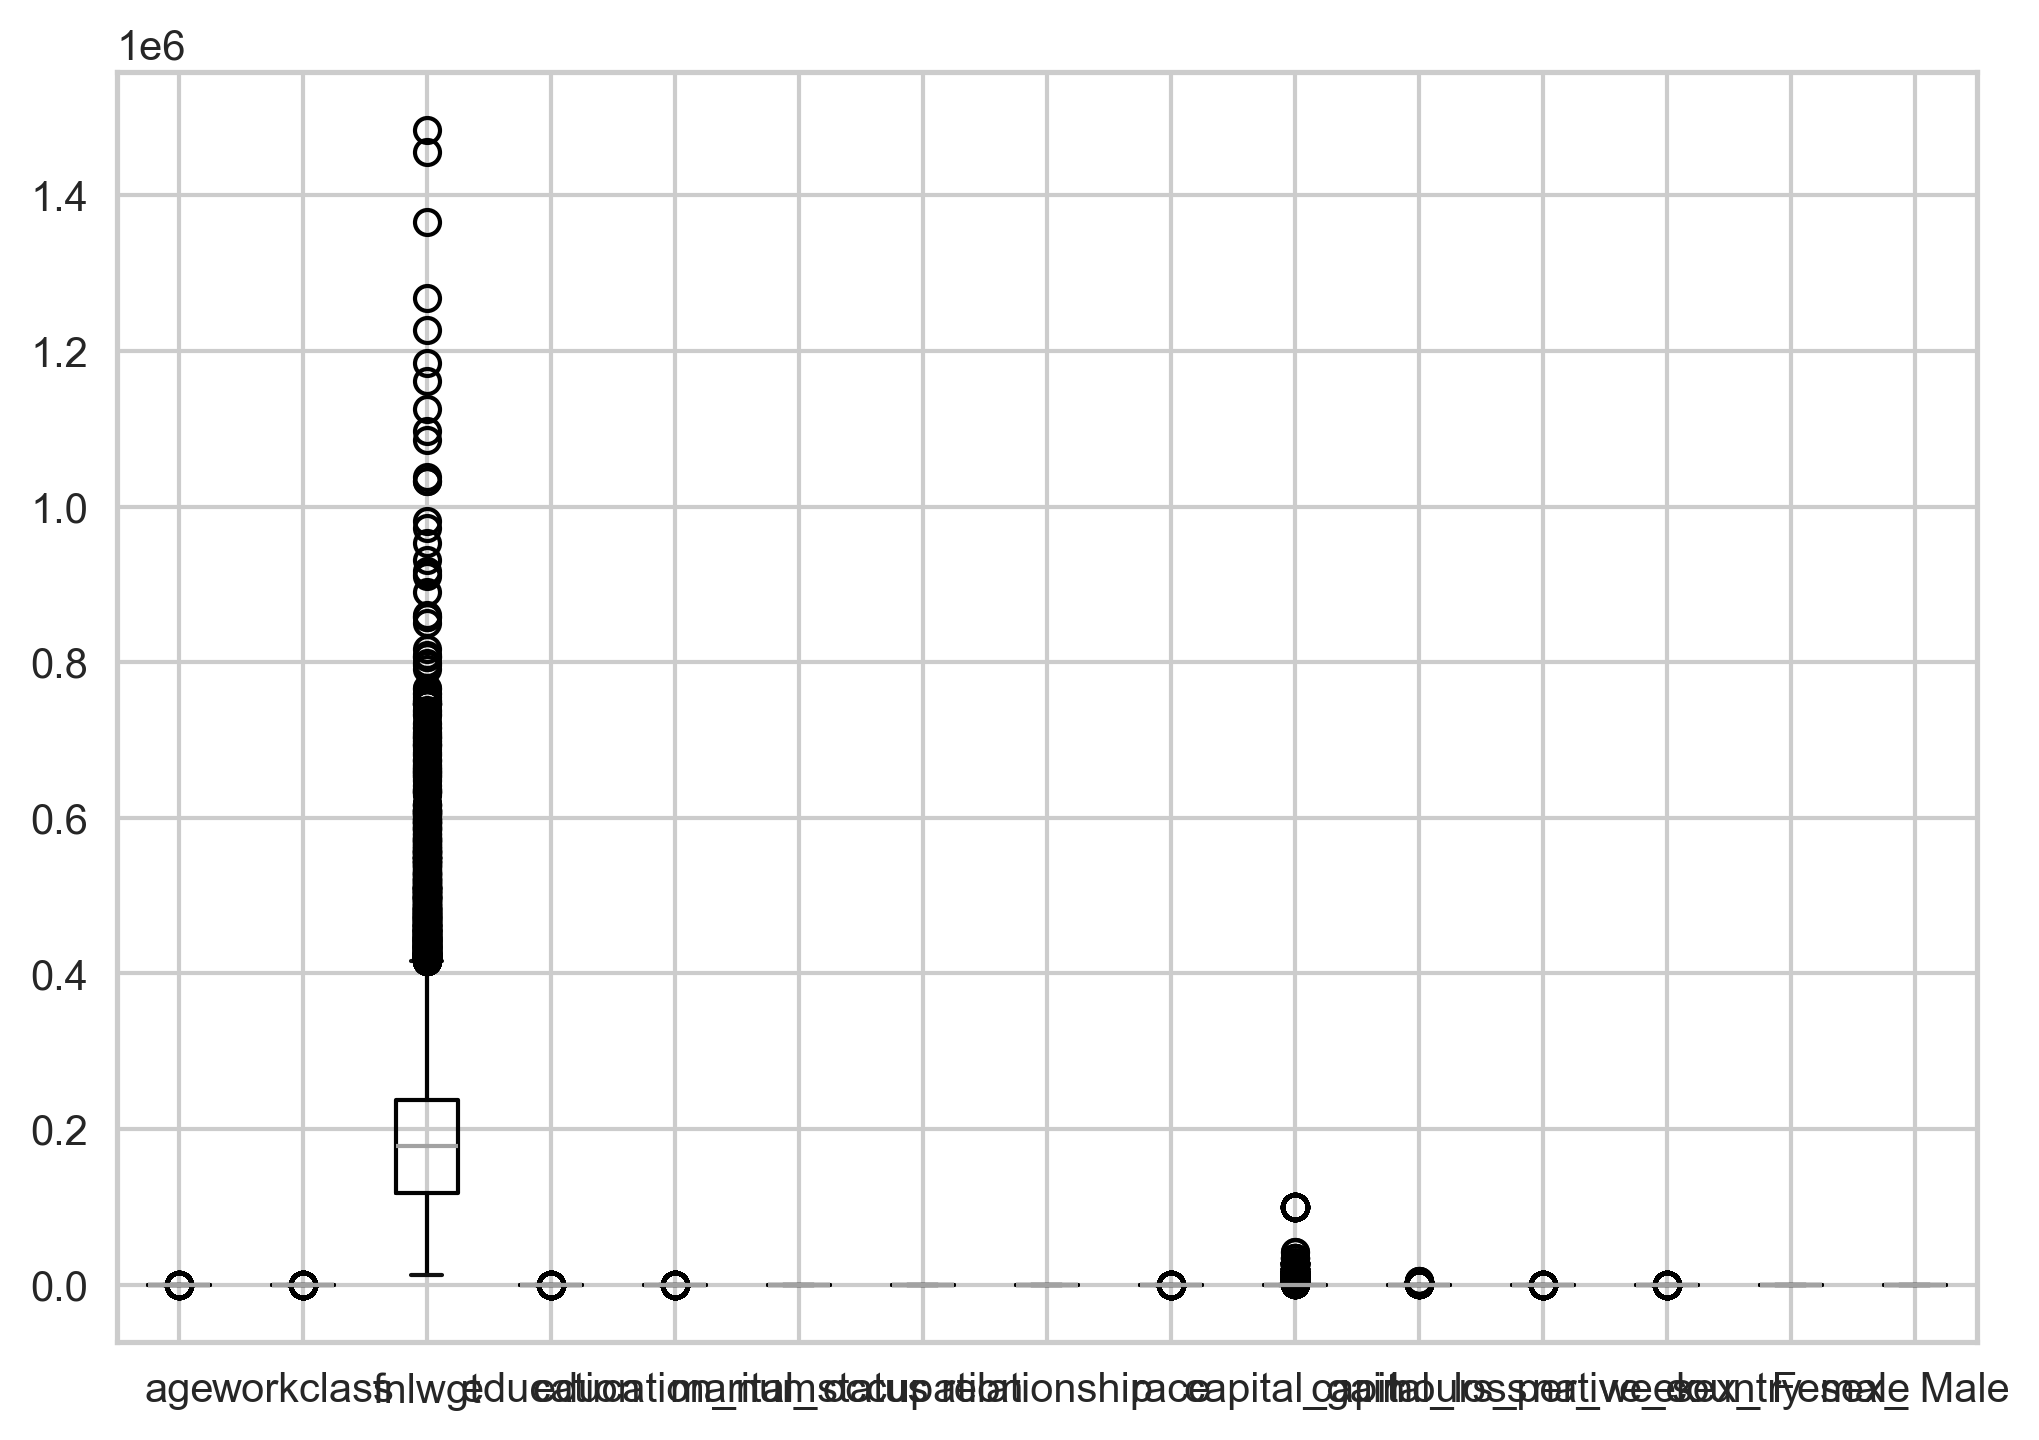

In [31]:
df.boxplot()

In [34]:
sns.pairplot(df)

In [37]:
iso = IsolationForest()
iso.fit(df)
ypred = iso.predict(df)
ypred

array([ 1,  1,  1, ...,  1,  1, -1])

In [38]:
len(ypred)

32561

In [39]:
df['Outliers'] = ypred
df

age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  capital_gain  capital_loss  \
0               1             1     4          2174             0   
1               4             0     4             0             0   
2               6             1     4             0             0   
3               6             0     2             0             0   
4              10             5     2             0             0   
...           ...           ...   ...           ...           ...   
32556          13             5     4             0             0   
32557           7             0     4             0             0   
32558           1             4     4             0             0   
32559           1             3     4             0             0   
32560           4             5     4         15024             0   

       hours_per_week  native_country  sex_ Female  sex_ Male  Outliers  
0                  40              39            0          1         1  
1                  13              39            0          1         1  
2                  40              39            0          1         1  
3                  40              39            0          1         1  
4                  40               5            1          0        -1  
...               ...             ...          ...        ...       ...  
32556              38              39            1          0         1  
32557              40              39            0          1         1  
32558              40              39            1          0         1  
32559              20              39            0          1         1  
32560              40              39            1          0        -1  

[32561 rows x 16 columns]

In [40]:
df['Outliers'].value_counts()

 1    27419
-1     5142
Name: Outliers, dtype: int64

In [ ]:
# removing outliers by selecting only inliers

In [45]:
data = df[df['Outliers'] == 1]
data

age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
5       37          4  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   22          4  310152         15             10               4   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   

       occupation  relationship  race  capital_gain  capital_loss  \
0               1             1     4          2174             0   
1               4             0     4             0             0   
2               6             1     4             0             0   
3               6             0     2             0             0   
5               4             5     4             0             0   
...           ...           ...   ...           ...           ...   
32555          11             1     4             0             0   
32556          13             5     4             0             0   
32557           7             0     4             0             0   
32558           1             4     4             0             0   
32559           1             3     4             0             0   

       hours_per_week  native_country  sex_ Female  sex_ Male  Outliers  
0                  40              39            0          1         1  
1                  13              39            0          1         1  
2                  40              39            0          1         1  
3                  40              39            0          1         1  
5                  40              39            1          0         1  
...               ...             ...          ...        ...       ...  
32555              40              39            0          1         1  
32556              38              39            1          0         1  
32557              40              39            0          1         1  
32558              40              39            1          0         1  
32559              20              39            0          1         1  

[27419 rows x 16 columns]

In [ ]:
# Apply the PPS (Predictive Power Score) 

In [46]:
import ppscore as ps

In [47]:
feature_sel = ps.matrix(data)
feature_sel

x               y  ppscore            case  is_valid_score  \
0         age             age      1.0  predict_itself            True   
1         age       workclass      0.0      regression            True   
2         age          fnlwgt      0.0      regression            True   
3         age       education      0.0      regression            True   
4         age   education_num      0.0      regression            True   
..        ...             ...      ...             ...             ...   
251  Outliers  hours_per_week      0.0      regression            True   
252  Outliers  native_country      0.0      regression            True   
253  Outliers     sex_ Female      0.0      regression            True   
254  Outliers       sex_ Male      0.0      regression            True   
255  Outliers        Outliers      1.0  predict_itself            True   

                  metric  baseline_score   model_score  \
0                   None          0.0000      1.000000   
1    mean absolute error          0.6330      0.738070   
2    mean absolute error      73488.7076  74337.414448   
3    mean absolute error          2.4128      2.475444   
4    mean absolute error          1.7082      1.782540   
..                   ...             ...           ...   
251  mean absolute error          6.8954      7.281027   
252  mean absolute error          1.0474      1.971152   
253  mean absolute error          0.2846      0.407226   
254  mean absolute error          0.2846      0.407226   
255                 None          0.0000      1.000000   

                       model  
0                       None  
1    DecisionTreeRegressor()  
2    DecisionTreeRegressor()  
3    DecisionTreeRegressor()  
4    DecisionTreeRegressor()  
..                       ...  
251  DecisionTreeRegressor()  
252  DecisionTreeRegressor()  
253  DecisionTreeRegressor()  
254  DecisionTreeRegressor()  
255                     None  

[256 rows x 9 columns]